### Exercise 12.1

<span>Change at will and train your DNN by increasing the number of epochs to an adeuqate value</span>. Try to use at least two other optimizers, different from SGD: <span>watch to accuracy and loss for training and validation data and comment on the performances</span>.

In [2]:
#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True' #This is needed in my Anaconda+MacOsX installation; leave it commented.
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

2024-06-07 11:14:34.784006: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
X_train shape: (60000, 28, 28)
Y_train shape: (60000,)


X_train shape: (60000, 784)
X_test shape: (10000, 784)

an example of a data point with label 4


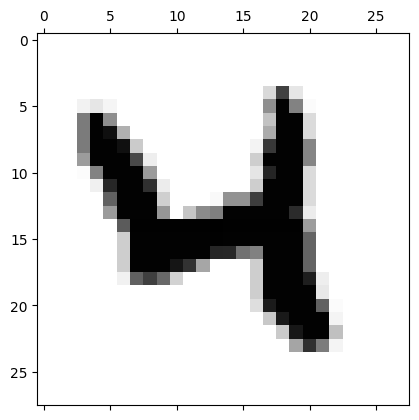

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [3]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=RMSprop(),
                  metrics=['acc'])
    return model

Q: What is 'acc'?

A: Calculates how often predictions equal labels.
This metric creates two local variables, total and count that are used to compute the frequency with which y_pred matches y_true. This frequency is ultimately returned as binary accuracy: an idempotent operation that simply divides total by count.

So I guess it's normal that it goes to 1 by incresing the number of epochs (see pictures below)...

In [5]:
# training parameters
batch_size = 32
epochs = 50

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/50
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2769 - acc: 0.9214 - val_loss: 0.1294 - val_acc: 0.9659
Epoch 2/50
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1529 - acc: 0.9631 - val_loss: 0.1339 - val_acc: 0.9701
Epoch 3/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1381 - acc: 0.9689 - val_loss: 0.1564 - val_acc: 0.9725
Epoch 4/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1421 - acc: 0.9708 - val_loss: 0.1234 - val_acc: 0.9727
Epoch 5/50
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1438 - acc: 0.9715 - val_loss: 0.1744 - val_acc: 0.9706
Epoch 6/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1397 - acc: 0.9725 - val_loss: 0.1820 - val_acc: 0.9739
Epoch 7/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1440 - acc: 0.9744 - val_loss: 0.1782 - val_acc: 0.9780
Epoch 8/50
1875/1875 [==============================] -

313/313 [==============================] - 1s 2ms/step - loss: 0.7538 - acc: 0.9679

Test loss: 0.7537536025047302
Test accuracy: 0.9678999781608582


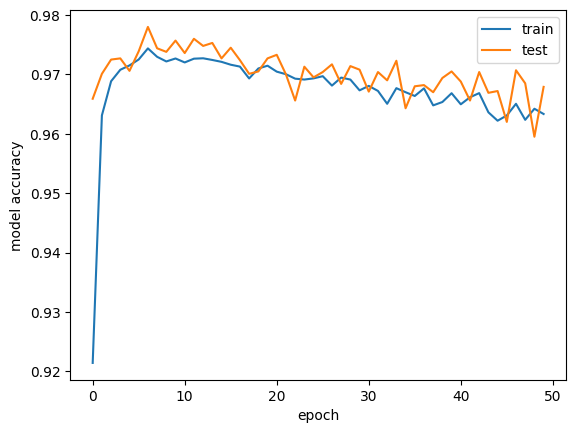

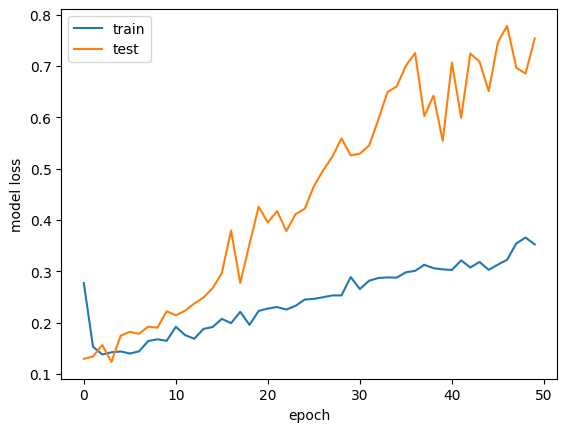

In [6]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

313/313 [==============================] - 1s 3ms/step


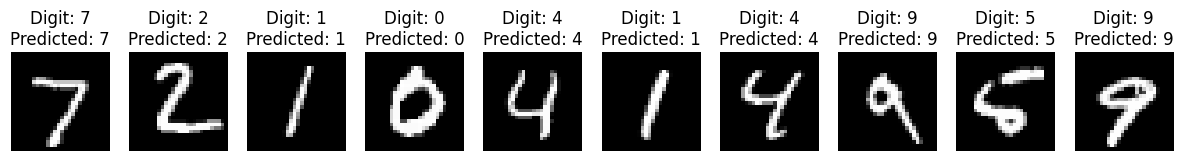

In [9]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Seguono i grafici inerenti alle loss e accuracy per i diversi ottimizzatori provati:

ACCURACY AND LOSS FOR SGD AS OPTIMIZER


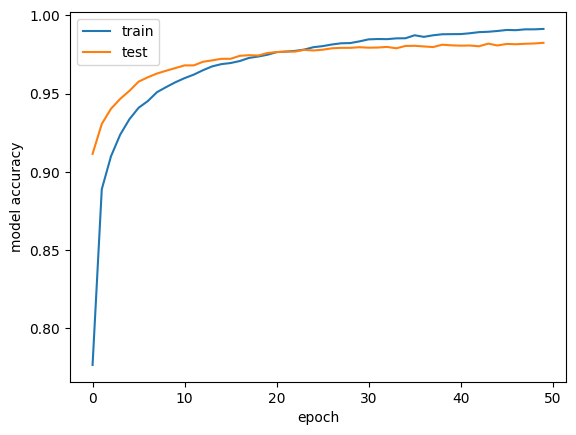

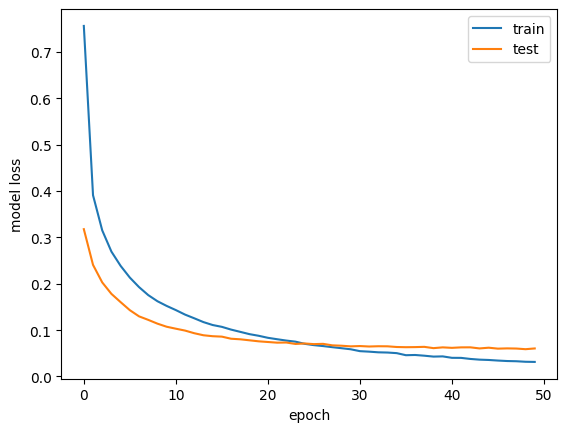

ACCURACY AND LOSS FOR ADAM AS OPTIMIZER


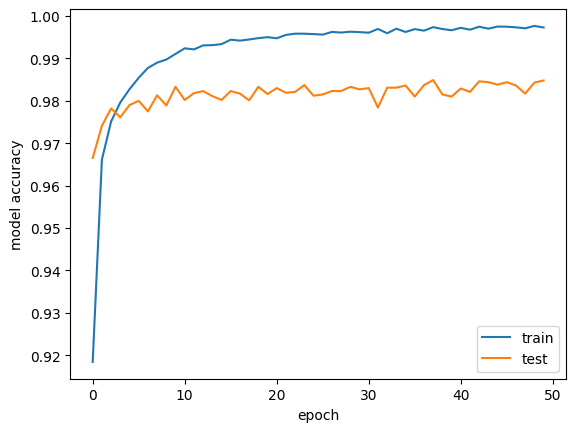

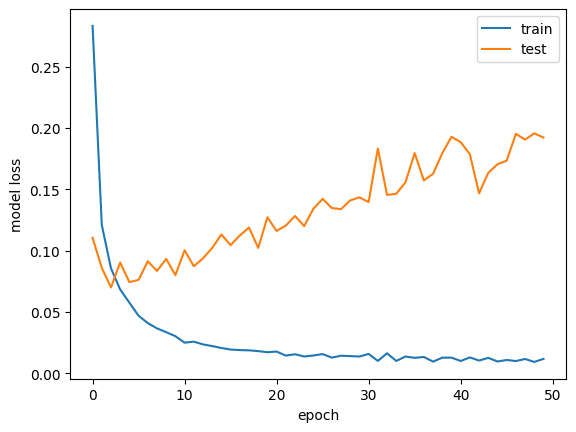

ACCURACY AND LOSS FOR RMSPROP AS OPTIMIZER


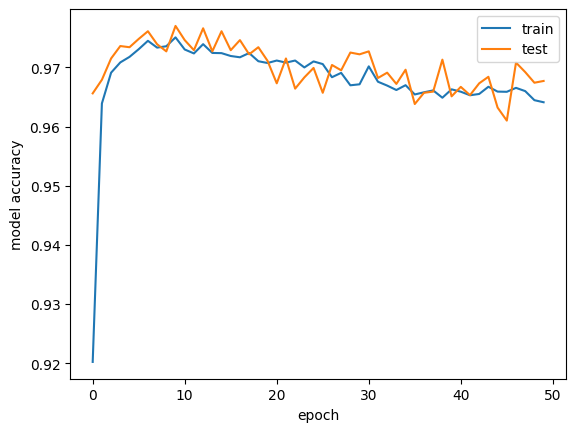

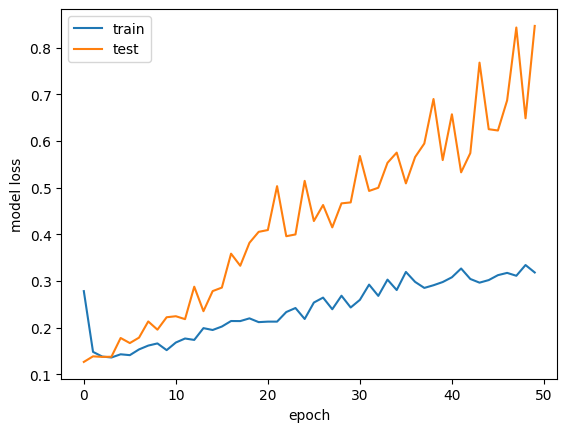

In [1]:
from IPython.display import display
from PIL import Image

print("Seguono i grafici inerenti alle loss e accuracy per i diversi ottimizzatori provati:\n")
print("ACCURACY AND LOSS FOR SGD AS OPTIMIZER")
img = Image.open("es1_acc_sgd.png")
img2 = Image.open("es1_loss_sgd.png")
display(img)
display(img2)

print("ACCURACY AND LOSS FOR ADAM AS OPTIMIZER")
img = Image.open("es1_acc_Adam.png")
img2 = Image.open("es1_loss_Adam.png")
display(img)
display(img2)

print("ACCURACY AND LOSS FOR RMSPROP AS OPTIMIZER")
img = Image.open("es1_acc_RMSprop.png")
img2 = Image.open("es1_loss_RMSprop.png")
display(img)
display(img2)



Evidentemente, il caso migliore (tra quelli indagati) è quello con sgd come ottimizzatore.
Sono state utilizzate 50 epoche.
Il modello dato non è stato cambiato in nulla se non per quanto riguarda gli ottimizzatori.